In [1]:
%matplotlib inline

from scipy.spatial.distance import cosine
import numpy as np
import matplotlib
from sklearn.decomposition import PCA

# Decode special characters in data files, print to stdout
import sys
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout

In [3]:
# Import csv data as numpy array of vectors
data = np.genfromtxt('data_letters.csv', delimiter=',', names=True, filling_values=-1, deletechars="\xef\xbb\xbf")
data_cleaned = np.genfromtxt('data_letters_cleaned.csv', delimiter=',', names=True, filling_values=-1, deletechars="\xef\xbb\xbf")

In [4]:
# Calculate cosine similarity of vote vectors, print top 2
print "Each person's top 2 most similar voters, where 0 = completely different and 1 = the same"
for name1 in data.dtype.names:
    most_sim1 = ''
    max_sim1 = 0
    most_sim2 = ''
    max_sim2 = 0
    for name2 in data.dtype.names:
        if name1 != name2:
            sim = 1 - cosine(data[name1], data[name2])
            if sim > max_sim1:
                max_sim2 = max_sim1
                most_sim2 = most_sim1
                max_sim1 = sim
                most_sim1 = name2
            elif sim > max_sim2:
                max_sim2 = sim
                most_sim2 = name2
    print '{}: {} ({}), {} ({})'.format(name1, most_sim1, str(max_sim1), most_sim2, str(max_sim2))

Each person's top 2 most similar voters, where 0 = completely different and 1 = the same
a: h (0.8915150331730376), c (0.849511477398197)
b: m (0.8351924534525315), k (0.8350959250778516)
c: a (0.849511477398197), h (0.8462049408579267)
d: k (0.8750000000000001), m (0.865484644815831)
e: f (0.915497214246348), h (0.9024731748508102)
f: e (0.915497214246348), m (0.9062018310901974)
g: e (0.7625955772948407), d (0.7514174180844605)
h: e (0.9024731748508102), f (0.901153313640909)
i: k (0.13867504905630723), b (0.09150180217433546)
j: e (0.8166967341784954), l (0.7844417360195096)
k: m (0.8871217609362267), f (0.8831786506622018)
l: f (0.8667781422175382), e (0.8365160106923107)
m: f (0.9062018310901974), k (0.8871217609362267)
n: m (0.690637382798706), h (0.6867897908400852)
o: i (0.06906825157099705),  (0)


2D Visualization of Votes- All Data


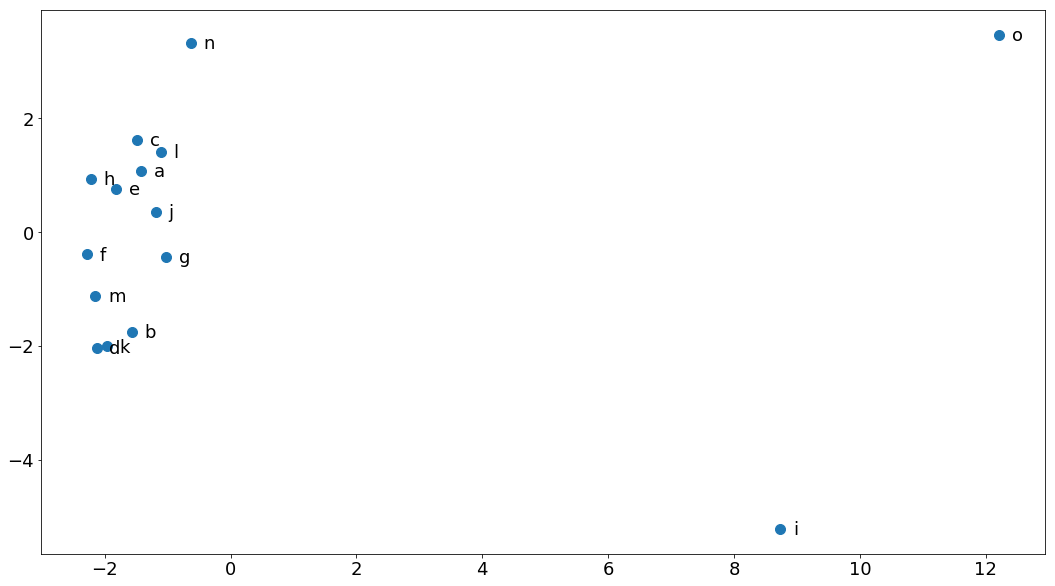

In [5]:
print "2D Visualization of Votes- All Data"
vote_data = []
for name in data.dtype.names:
    vote_data.append(data[name])

# Reduce dimensionality to 2 components using PCA
data_2d = PCA(n_components=2).fit_transform(vote_data)
x, y = zip(*data_2d)

# Style and plot points on scatter plot
matplotlib.rcParams.update({'font.size': 18})
fig, ax = matplotlib.pyplot.subplots(figsize=(18, 10))
ax.scatter(x, y, s=100)

# Label points
for i, txt in enumerate(data.dtype.names):
    ax.annotate(txt, (x[i] + 0.2, y[i] - 0.1))

matplotlib.pyplot.show()

2D Visualization of Votes- Outliers Removed


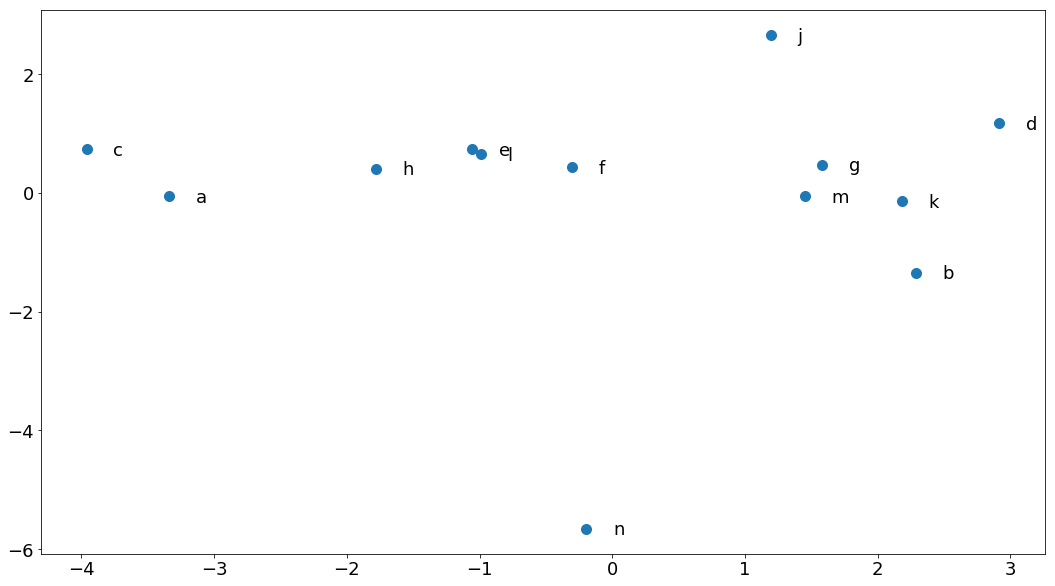

In [6]:
print "2D Visualization of Votes- Outliers Removed"
vote_data = []
for name in data_cleaned.dtype.names:
    vote_data.append(data_cleaned[name])

# Reduce dimensionality to 2 components using PCA
data_2d = PCA(n_components=2).fit_transform(vote_data)
x, y = zip(*data_2d)

# Style and plot points on scatter plot
matplotlib.rcParams.update({'font.size': 18})
fig, ax = matplotlib.pyplot.subplots(figsize=(18, 10))
ax.scatter(x, y, s=100)

# Label points
for i, txt in enumerate(data_cleaned.dtype.names):
    ax.annotate(txt, (x[i] + 0.2, y[i] - 0.1))

matplotlib.pyplot.show()